# Analogous-bars at birthtime
* Run the similarity-centric analogous bars method between simulated grid cells and conjunctive cells

In [1]:
using Pkg
Pkg.activate("../../env/.")

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

WebIO._IJuliaInit()

Main.Eirene_var

In [3]:
using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Plots
using JLD

# 1. Load distance matrices


In [4]:
# load dissimilarity
total_D = readdlm("data/total_dissimilarity.csv")

# get number of neurons in AL
AL_txt = open("data/AL_neurons_idx.txt", "r")
AL_linebyline = readlines(AL_txt)
close(AL_txt)
n_AL = size(AL_linebyline, 1)

# get number of neurons in V1
V1_txt = open("data/V1_neurons_idx.txt", "r")
V1_linebyline = readlines(V1_txt)
close(V1_txt)
n_V1 = size(V1_linebyline, 1)

# Define submatrices 
D_V1 = total_D[1:n_V1, 1:n_V1]
D_AL = total_D[n_V1+1:end, n_V1+1:end]
D_V1_AL = total_D[1:n_V1, n_V1+1:end]
    # rows (landmarks): V1
    # columns (witness) : AL
D_AL_V1 = total_D[n_V1+1:end, 1:n_V1];
    # rows (landmarks): AL
    # columns (witness) : V1

# 2. Compute persistence

In [5]:
C_V1 = eirene(D_V1, record = "all", maxdim = 1)
C_AL = eirene(D_AL, record = "all", maxdim = 1)
W_V1 = compute_Witness_persistence(D_V1_AL)

barcode_V1 = barcode(C_V1, dim = 1)
barcode_AL = barcode(C_AL, dim = 1)
barcode_W_V1_AL = barcode(W_V1["eirene_output"], dim = 1);

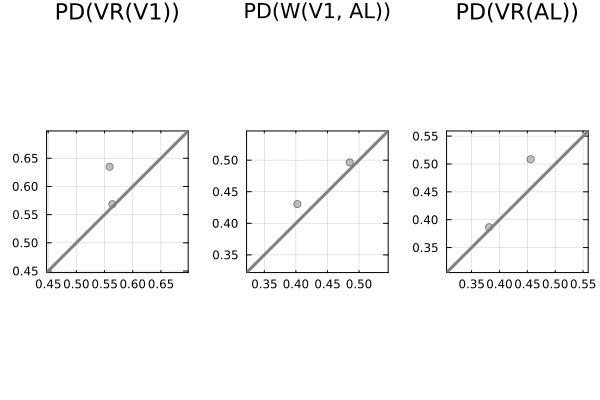

In [6]:
p1 = plot_PD(barcode_V1, title = "PD(VR(V1))", titlefontsize = 15)
p2 = plot_PD(barcode_W_V1_AL, title = "PD(W(V1, AL))")
p3 = plot_PD(barcode_AL, title = "PD(VR(AL))", titlefontsize = 15)
plot(p1, p2, p3, layout = grid(1,3))

# 3. Run baseline similarity-centric analogous bars from Witness birthtime

Run analogous cycles on both witness cycles 1 and 2

In [12]:
@time analogous_V1_1, analogous_AL_1 = analogous_bars.run_baseline_similarity_analogous_birthtime_fast(
                                            VR_P = C_V1,
                                            D_P = D_V1,
                                            VR_Q = C_AL,
                                            D_Q = D_AL,
                                            W_PQ = W_V1,
                                            W_PQ_bar = 1
                                            );

extension to P complete
computed Dowker dual
extension to Q complete
  0.071203 seconds (449.41 k allocations: 67.255 MiB, 14.39% gc time)


In [13]:
# note that there are no analgous cycles matched via witness_idx = 1

println("Analogous via witness_idx 1")
println(analogous_V1_1["baseline_bar_extension"])
println(analogous_AL_1["baseline_bar_extension"])

Analogous via witness_idx 1
nothing
nothing


In [14]:
@time analogous_V1_2, analogous_AL_2 = analogous_bars.run_baseline_similarity_analogous_birthtime_fast(
                                            VR_P = C_V1,
                                            D_P = D_V1,
                                            VR_Q = C_AL,
                                            D_Q = D_AL,
                                            W_PQ = W_V1,
                                            W_PQ_bar = 2
                                            );

extension to P complete
computed Dowker dual
extension to Q complete
  0.703084 seconds (1.28 M allocations: 138.888 MiB, 2.65% gc time, 85.70% compilation time)


In [16]:
println("Analogous via witness_idx 2")
println(analogous_V1_2["baseline_bar_extension"])
println(analogous_AL_2["baseline_bar_extension"])

Analogous via witness_idx 2
[2]
[2]


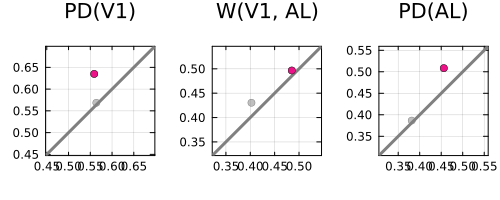

In [19]:
# plot persistence diagrams
witness_bar = 137
p1 = plot_PD(barcode_V1, title = "PD(V1)", highlight = analogous_V1_2["baseline_bar_extension"])
p2 = plot_PD(barcode_W_V1_AL, title = "W(V1, AL)", highlight = [2])
p3 = plot_PD(barcode_AL, title = "PD(AL)", highlight = analogous_AL_2["baseline_bar_extension"])
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

# Save

In [21]:
# save barcodes
directory = "birthtime_analogous_outputs/"
# writedlm(directory * "barcode_V1.csv",  barcode_V1, ',')
# writedlm(directory * "barcode_AL.csv",  barcode_AL, ',')
# writedlm(directory * "barcode_W_V1_AL.csv", barcode_W_V1_AL, ',')

In [23]:
# save analogous pairs
save(directory * "V1_AL_analogous_via_2.jld2",
    "analogous_V1", analogous_V1_2["baseline_bar_extension"],
    "analogous_AL", analogous_AL_2["baseline_bar_extension"])


In [24]:
analogous_V1 = load(directory * "V1_AL_analogous_via_2.jld2")

Dict{String, Any} with 2 entries:
  "analogous_AL" => [2]
  "analogous_V1" => [2]